<a href="https://colab.research.google.com/github/Ovizero01/Machine-Leaning/blob/main/020_AdaBoost/020_AdaBoost%20Practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# 📘 Module 20: AdaBoost (Adaptive Boosting) – Practice Notebook

This is a **full practice notebook with detailed guidance and TODO blocks**.


## 0. Notebook Setup

We start by importing all required libraries.  


In [2]:
# TODO: Import all required libraries (Done for you)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


## 1. Understanding the Dataset

You can begin with a **synthetic binary classification dataset**. or with any exisiting dataset.

Focus questions:
- Are the classes easily separable?
- Will a weak learner struggle?


In [3]:
# TODO: Generate a binary classification dataset
from sklearn.datasets import make_classification
# Hint:
# - n_samples around 500
# - n_features = 2
# - class_sep > 1
X, y = make_classification(
    n_samples=500,
    n_features=2,
    n_informative=2,
    n_redundant=0,
    n_clusters_per_class=1,
    class_sep=1.5,
    random_state=42
)

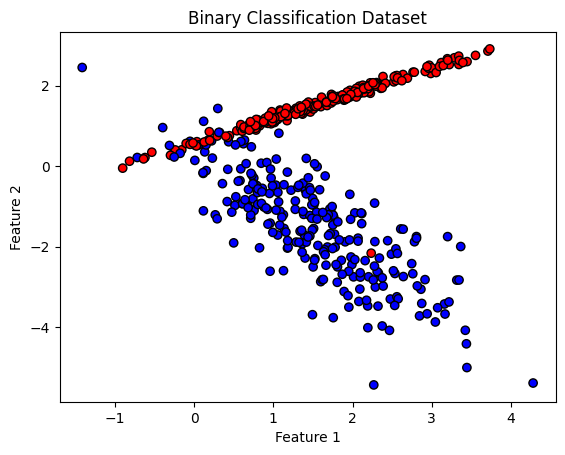

In [4]:
# TODO: Visualize the dataset using a scatter plot
# Color points by class label
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', edgecolor='k')
# plt.scatter(...)
# plt.show()
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Binary Classification Dataset")
plt.show()


## 2. Train–Test Split

Before any model training, we split the data.

Why?
- To evaluate generalization
- To avoid lying to ourselves

Standard split:
- 70% training
- 30% testing


In [5]:
# TODO: Split the dataset into training and testing sets
# Use test_size=0.3 and random_state=42
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)


## 3. Baseline Weak Learner (Decision Stump)

Before AdaBoost, we test **one weak learner alone**.

We intentionally restrict the model:
- max_depth = 1
- This is called a **decision stump**

Expectation:
- Accuracy will not be impressive
- That is the point


In [26]:
# TODO: Create a DecisionTreeClassifier with max_depth=1
stump1 = DecisionTreeClassifier(max_depth=2, random_state=42)
# SVM, Logistic Regression
stump2 = SVC(kernel='linear', C=0.1, random_state=42)
stump3 = LogisticRegression(max_iter=1000, C=0.1, random_state=42)
# This is our weak learner

In [27]:
# TODO: Train the weak learner
stump1.fit(X_train, y_train)
stump2.fit(X_train, y_train)
stump3.fit(X_train, y_train)
# TODO: Predict on test data
stump1_pred = stump1.predict(X_test)
stump2_pred = stump2.predict(X_test)
stump3_pred = stump3.predict(X_test)
# TODO: Calculate and print accuracy
stump1_acc = accuracy_score(y_test, stump1_pred)
stump2_acc = accuracy_score(y_test, stump2_pred)
stump3_acc = accuracy_score(y_test, stump3_pred)
print("Decision Tree Accuracy:", stump1_acc)
print("SVM Accuracy:", stump2_acc)
print("Logistic Regression Accuracy:", stump3_acc)

Decision Tree Accuracy: 0.94
SVM Accuracy: 0.94
Logistic Regression Accuracy: 0.9266666666666666



## 4. AdaBoost Classifier – Core Practice

Now we combine **many weak learners** using AdaBoost.

Key idea:
- Each learner focuses more on previous mistakes
- Misclassified samples get more attention
- Correctly classified samples slowly matter less


In [28]:
# TODO: Initialize AdaBoostClassifier
base_learner = DecisionTreeClassifier(max_depth=2, random_state=42)
# Use:
# - base_estimator = decision stump
# - n_estimators = 50
# - learning_rate = 1.0
ada = AdaBoostClassifier(
    estimator = base_learner,
    n_estimators=50,
    learning_rate=1.0,
    random_state=42
)

In [29]:
# TODO: Train AdaBoost on training data
ada.fit(X_train, y_train)
# TODO: Predict on test data
y_pred = ada.predict(X_test)
# TODO: Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
# TODO: Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.94
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.99      0.94        75
           1       0.99      0.89      0.94        75

    accuracy                           0.94       150
   macro avg       0.94      0.94      0.94       150
weighted avg       0.94      0.94      0.94       150




## 5. Weak Learner vs AdaBoost Comparison

Now we compare:
- One weak learner
- Many weak learners working together

Expectation:
- AdaBoost should outperform a single stump
- If not, something is wrong


In [30]:
# TODO: Create a comparison table
# Columns:
# - Model
# - Accuracy
comparison_table = pd.DataFrame({
    "Model": ["Weak Learner (Decision Stump)", "AdaBoost"],
    "Accuracy": [stump1_acc, accuracy]
})
print(comparison_table)

                           Model  Accuracy
0  Weak Learner (Decision Stump)      0.94
1                       AdaBoost      0.94



## 6. Effect of Number of Estimators

AdaBoost performance depends heavily on:
- Number of estimators

More is not always better.

Your job:
- Experiment
- Observe
- Plot


In [31]:
# TODO: Try different n_estimators values
# Example: [5, 10, 20, 50, 100]
estimators = [5, 10, 20, 50, 100]
accs = []
for n in estimators:
  model = AdaBoostClassifier(
      estimator = base_learner,
      n_estimators = n,
      learning_rate = 0.3,
      random_state = 42
  )
# Store accuracy for each value
  model.fit(X_train, y_train)
  accs.append(accuracy_score(y_test, model.predict(X_test)))

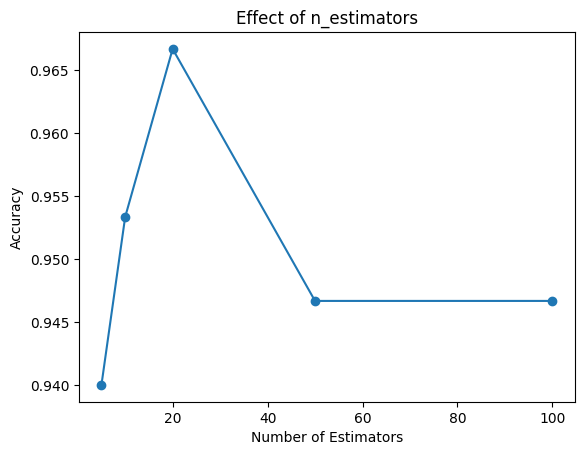

In [32]:
# TODO: Plot n_estimators vs accuracy
# Label axes clearly
plt.plot(estimators, accs, marker='o')
plt.xlabel('Number of Estimators')
plt.ylabel('Accuracy')
plt.title('Effect of n_estimators')
plt.show()


## 7. Effect of Learning Rate

Learning rate controls **how aggressively** AdaBoost updates sample weights.

Intuition:
- High learning rate → fast but risky
- Low learning rate → slow but stable

You will verify this experimentally.


In [33]:
# TODO: Experiment with different learning_rate values
# Example: [0.01, 0.1, 0.5, 1.0]
rates = [0.01, 0.1, 0.5, 1.0]
accs_lr = []

for lr in rates:
  model = AdaBoostClassifier(
      estimator = base_learner,
      n_estimators = 50,
      learning_rate = lr,
      random_state = 42
  )
  model.fit(X_train, y_train)
  accs_lr.append(accuracy_score(y_test, model.predict(X_test)))

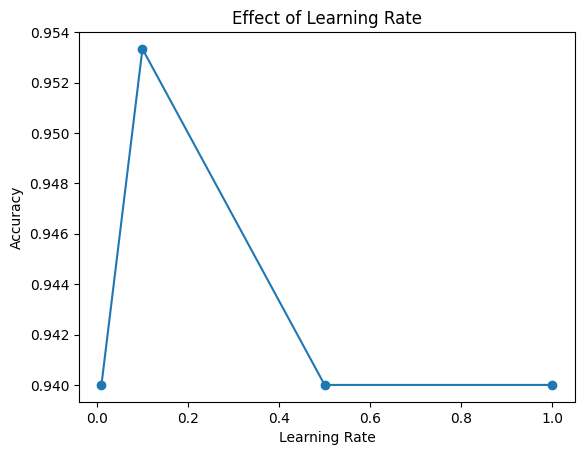

In [34]:
# TODO: Plot learning_rate vs accuracy
plt.plot(rates, accs_lr, marker='o')
plt.xlabel('Learning Rate')
plt.ylabel('Accuracy')
plt.title('Effect of Learning Rate')
plt.show()


## 8. Feature Importance in AdaBoost

AdaBoost can tell us:
- Which features were more influential

This depends on:
- How often a feature is used in splits
- How strong the corresponding learners were


In [37]:
# TODO: Extract feature importance from AdaBoost
# TODO: Plot feature importance
feature_importance = ada.feature_importances_

feature_df = pd.DataFrame({
    "Feature": [f"Feature {i+1}" for i in range(len(feature_importance))],
    "Importance": feature_importance
})

feature_df.head()

,Feature,Importance
0,Feature 1,0.348214
1,Feature 2,0.651786



## 9. Reflection (Mandatory)

Answer in your own words.

1. Why is AdaBoost called *adaptive*?
2. What happens to misclassified samples after each iteration?
3. Why do we prefer weak learners instead of strong ones?
4. When should AdaBoost not be used?


1. AdaBoost is called adaptive because it adjusts the importance (weights) of training samples after each iteration, giving more focus to the samples that were missclassified by previous weak learners.

2. After each iteration in AdaBoost, misclassified samples are given higher weights, so the next weak learner focuses more on them to try to correct the mistakes.

3. We prefer weak learners in AdaBoost because combining many simple models allows the ensemble to generalize better and reduce overfitting, whereas using strong learners can overfit the data and reduce the benefits of boosting.

4. AdaBoost should not be used on noisy datasets or when the base learner is already strong, because it may overfit or give little improvement. It can also be slow on very large datasets.


## 10. Bonus Challenge (Optional)

Replace the decision stump with **Logistic Regression** as the base estimator.

Questions:
- Does AdaBoost still work?
- Should you do this in practice?
- Why or why not?


In [38]:
# TODO: Replace DecisionTreeClassifier with LogisticRegression or SVM

lr_weak = LogisticRegression(
    C=0.1,
    max_iter=1000,
)

ada_lr = AdaBoostClassifier(
    estimator=lr_weak,
    n_estimators=50,
    learning_rate=1.0,
    random_state=42
)

# Train AdaBoost again
ada_lr.fit(X_train, y_train)
y_pred = ada_lr.predict(X_test)
ada_lr_acc = accuracy_score(y_test, y_pred)
print("AdaBoost (SVM) Accuracy:", ada_lr_acc)

# Compare performance
comparison_df = pd.DataFrame({
    "Model": [
        "Decision Stump",
        "AdaBoost (Decision Stump)",
        "AdaBoost (Logistic Regression)",
    ],
    "Accuracy": [
        stump1_acc,
        accuracy,
        ada_lr_acc
    ]
})

print(comparison_df)

AdaBoost (SVM) Accuracy: 0.9
                            Model  Accuracy
0                  Decision Stump      0.94
1       AdaBoost (Decision Stump)      0.94
2  AdaBoost (Logistic Regression)      0.90
